In [1]:
# ======================================================================================
# Notebook setup
# 
# Run this cell before all others to make sure that the Jupyter notebook works properly
# ======================================================================================

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
figsize = (14, 4.5)

## Overview

**This tutorial will focus on our target problem and dataset**

We will include some additional topics, including: 

* Building Cartesian plots
* Building histograms
* Building scatter plots

## Overview

**The lecture relies on the the following proficiencies and tools:**

* [Python](https://www.python.org/) programming
* Data handling using [the pandas module](https://pandas.pydata.org/)
* Plotting using [matplotlib](https://matplotlib.org/)

You will need them only if you plan to handle these tasks yourself

# An Example Problem

## Our Target Problem

**Let's assume we want to [estimate real-estate prices in Taiwan](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)**

<center><img src="assets/taiwan-tea-house.jpg" width=75%></center>


## Loading the Data

**Data for this problem is available (in csv format) from the `data` folder**

In [11]:
!wget -O real_estate.csv https://github.com/ai-pills/datasets/blob/main/real_estate.csv?raw=True

--2022-10-15 17:22:54--  https://github.com/ai-pills/datasets/blob/main/real_estate.csv?raw=True
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ai-pills/datasets/raw/main/real_estate.csv [following]
--2022-10-15 17:22:55--  https://github.com/ai-pills/datasets/raw/main/real_estate.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ai-pills/datasets/main/real_estate.csv [following]
--2022-10-15 17:22:55--  https://raw.githubusercontent.com/ai-pills/datasets/main/real_estate.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK


We will load the data via a Python library, called [pandas](https://pandas.pydata.org/)

In [13]:
data = pd.read_csv('real_estate.csv', sep=',')
data.head() # Head returns the first 5 elements

,house age,dist to MRT,#stores,latitude,longitude,price per area
0,14.8,393.2606,6,24.96172,121.53812,7.6
1,17.4,6488.0210,1,24.95719,121.47353,11.2
2,16.0,4066.5870,0,24.94297,121.50342,11.6
3,30.9,6396.2830,1,24.94375,121.47883,12.2
4,16.5,4082.0150,0,24.94155,121.50381,12.8


* The file content is a made accessible in a table-like object (called `DataFrame`)

## Loading the Data

**Let's have a peek at the data**

In [14]:
data.head()

,house age,dist to MRT,#stores,latitude,longitude,price per area
0,14.8,393.2606,6,24.96172,121.53812,7.6
1,17.4,6488.0210,1,24.95719,121.47353,11.2
2,16.0,4066.5870,0,24.94297,121.50342,11.6
3,30.9,6396.2830,1,24.94375,121.47883,12.2
4,16.5,4082.0150,0,24.94155,121.50381,12.8


* The first four columns contain quantities that easy to estimate
* ...But that's not true for the last one!

**Obtaining price information requires actual houses to be sold and bought**

* Our goal is to use the data to _learn a model_
* ...That can _estimate the price_ based on the easily available information

## Inspecting the Dataset

**Now that we roughly know our goal, it's a good idea to inspect the dataset**

Typically, this is done by building plots, e.g.:

* Histograms
  - x-axis: values for one attribute
  - y-axis: number of occurrences in the dataset
  - Continuous attributes are typically discretized (i.e. binned) first
* Cartesian plots
  - x-axis: table row number
  - y-axis: one attribute
* Scatter plots
  - x-axis: one attribute
  - y-axis: the target

## Using Histograms

**Let's inspect the "house age" attribute**

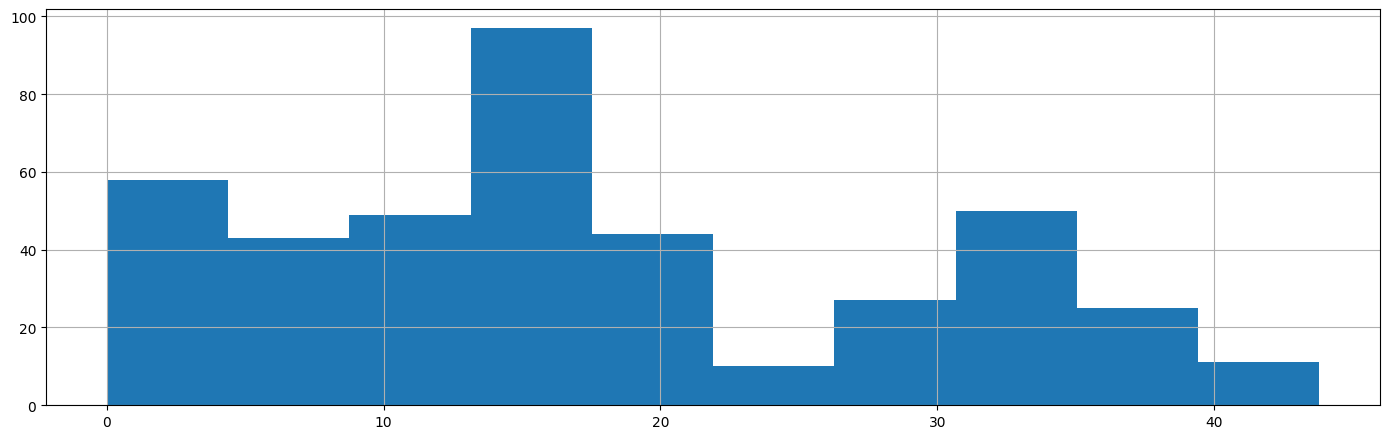

In [15]:
plt.figure()
data['house age'].hist(figsize=figsize)
plt.tight_layout()

* There seem to be two clusters w.r.t. this attribute

## Using Histograms

**Let's inspect the "dist to MRT" attribute**

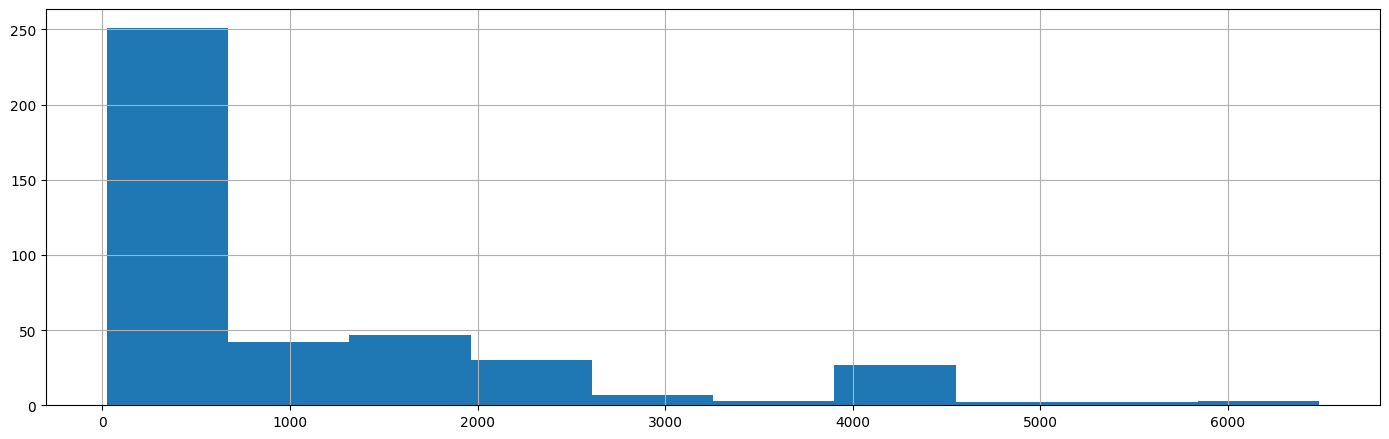

In [16]:
plt.figure()
data['dist to MRT'].hist(figsize=figsize)
plt.tight_layout()

* This attribute has a large range and low values are much more prevalent

## Using Histograms

**Let's inspect the "#stores" attribute**

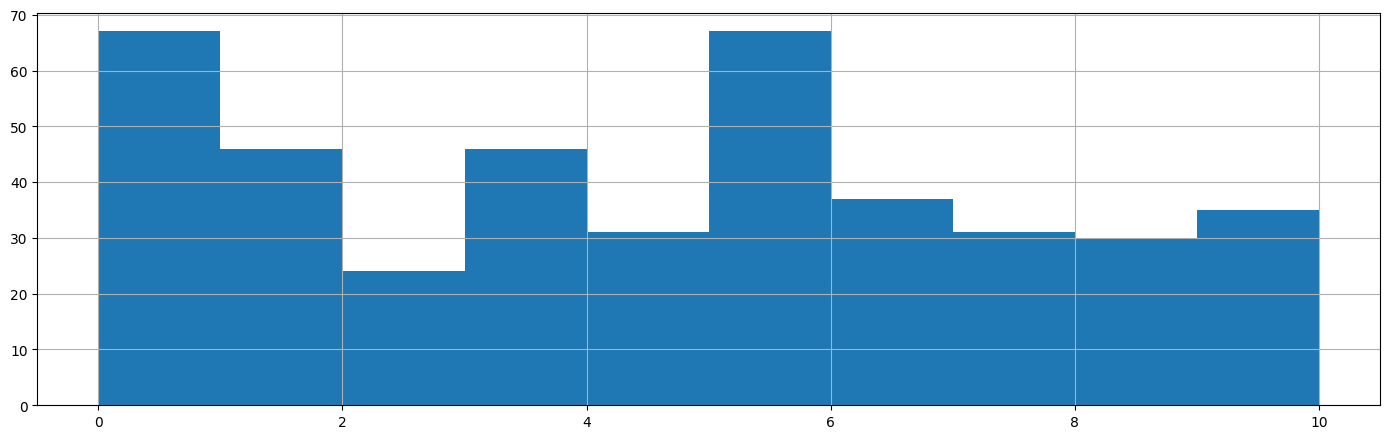

In [17]:
plt.figure()
data['#stores'].hist(figsize=figsize)
plt.tight_layout()

* The dataset covers rather uniformly the range for this attribute

## Using Histograms

**Let's inspect the "latitude" attribute**

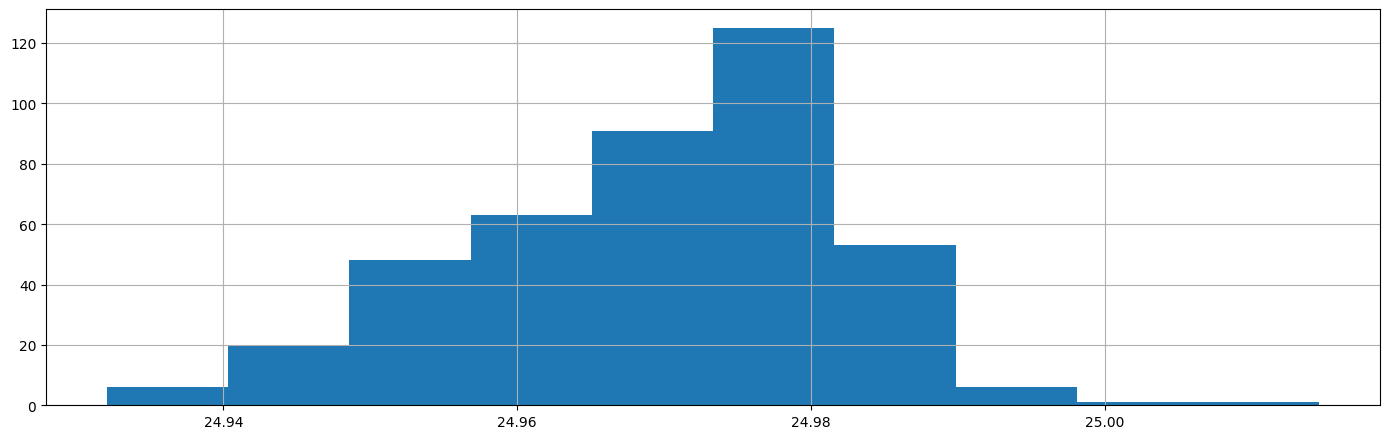

In [18]:
plt.figure()
data['latitude'].hist(figsize=figsize)
plt.tight_layout()

* There is a central cluster w.r.t. this attribute

## Using Histograms

**Let's inspect the "longitude" attribute**

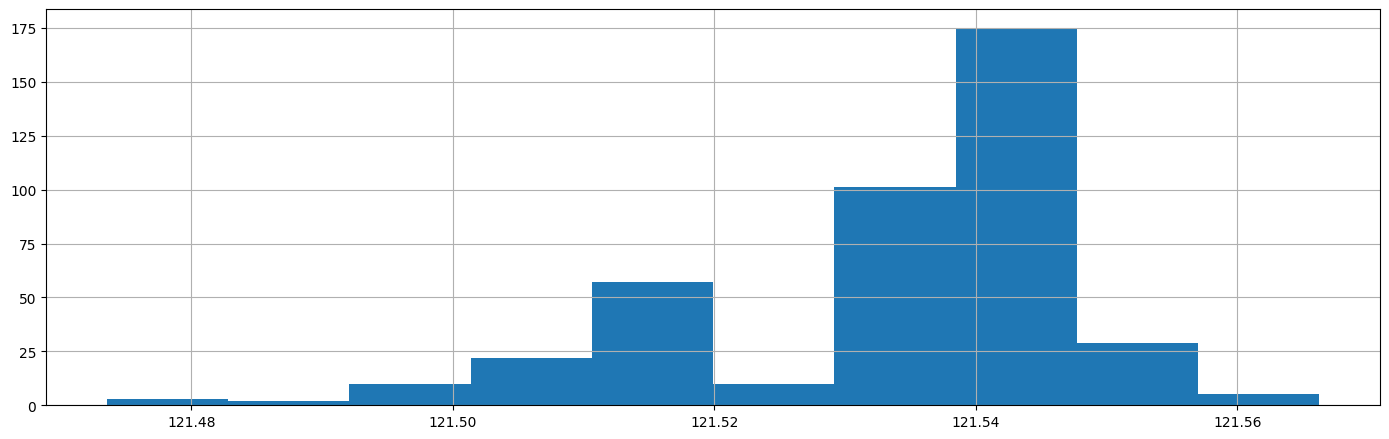

In [19]:
plt.figure()
data['longitude'].hist(figsize=figsize)
plt.tight_layout()

* The dataset is a bit less uniformly distributed w.r.t. longitude

## Using Histograms

**Let's inspect the target (i.e. "price per area")**

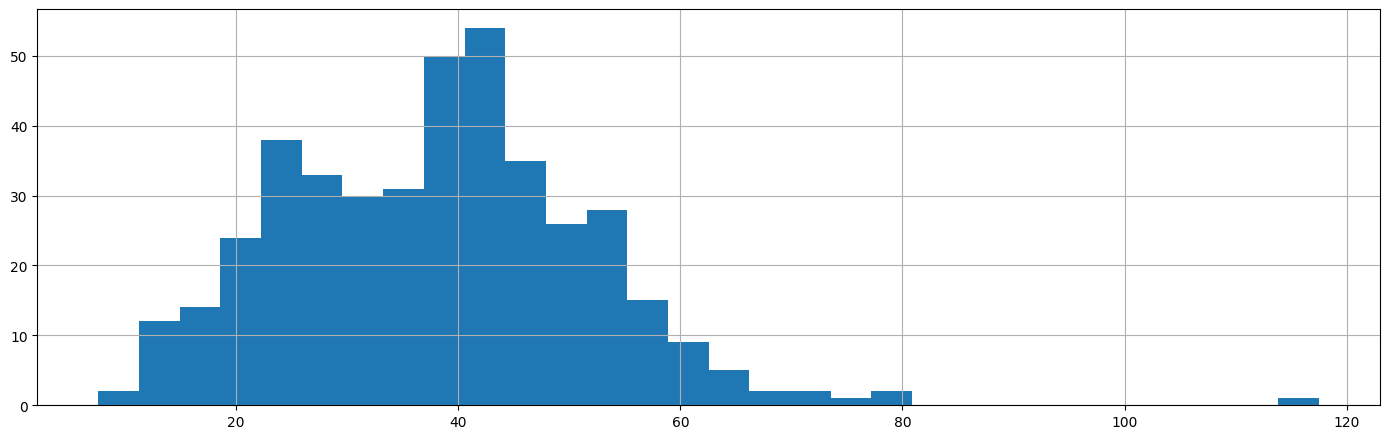

In [20]:
plt.figure()
data['price per area'].hist(figsize=figsize, bins=30)
plt.tight_layout()

* There are a few significant outliers here

## Using Cartesian Plots

**Let's inspect the "house age" attribute**

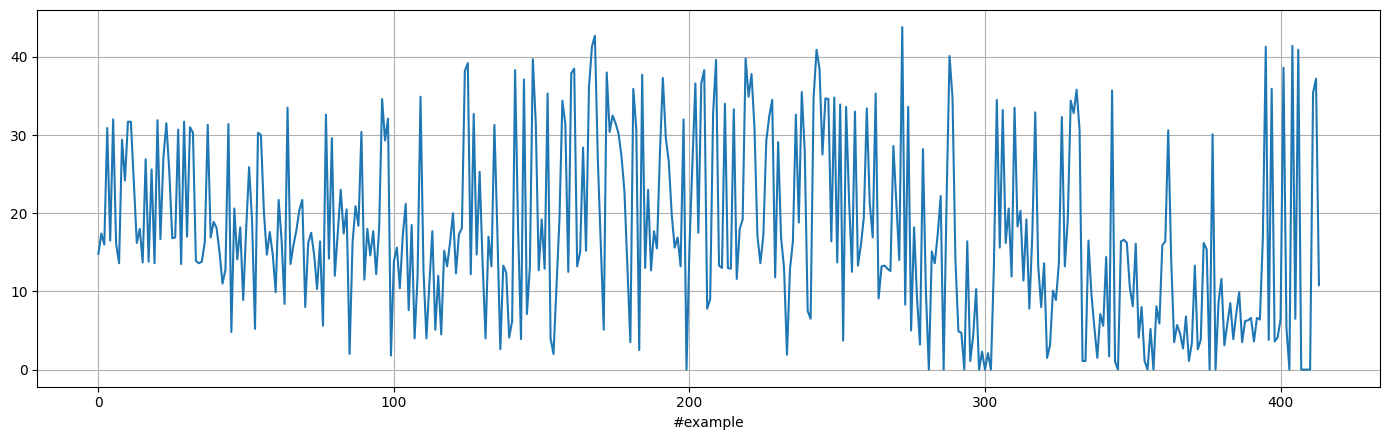

In [21]:
plt.figure()
data['house age'].plot(xlabel='#example', grid=':', figsize=figsize)
plt.tight_layout()

* No significant pattern here

## Using Cartesian Plots

**Let's inspect the "dist to MRT" attribute**

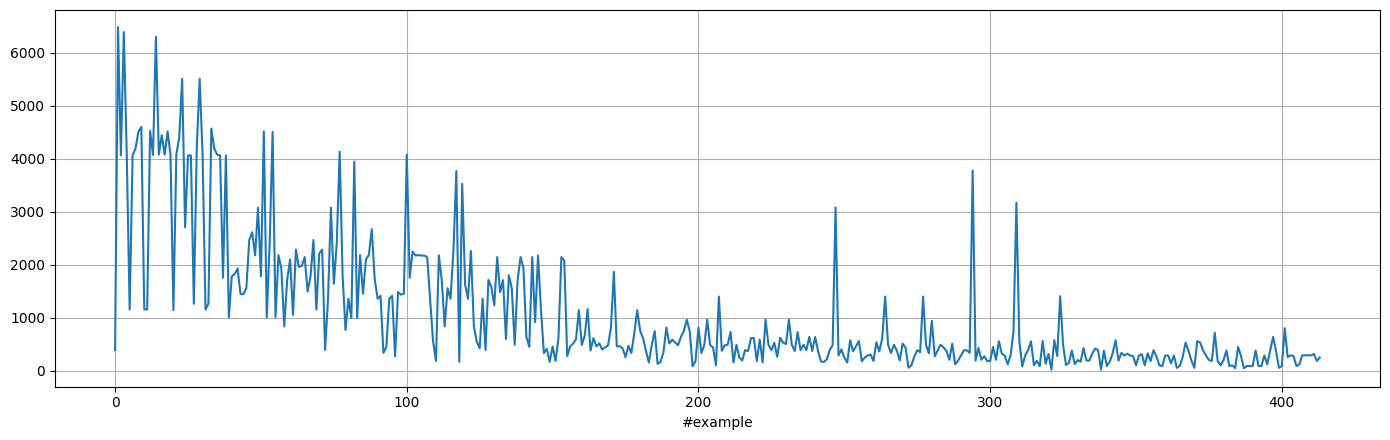

In [22]:
plt.figure()
data['dist to MRT'].plot(xlabel='#example', grid=':', figsize=figsize)
plt.tight_layout()

* This attribute roughly decreases along the table

## Using Cartesian Plots

**Let's inspect the "#stores" attribute**

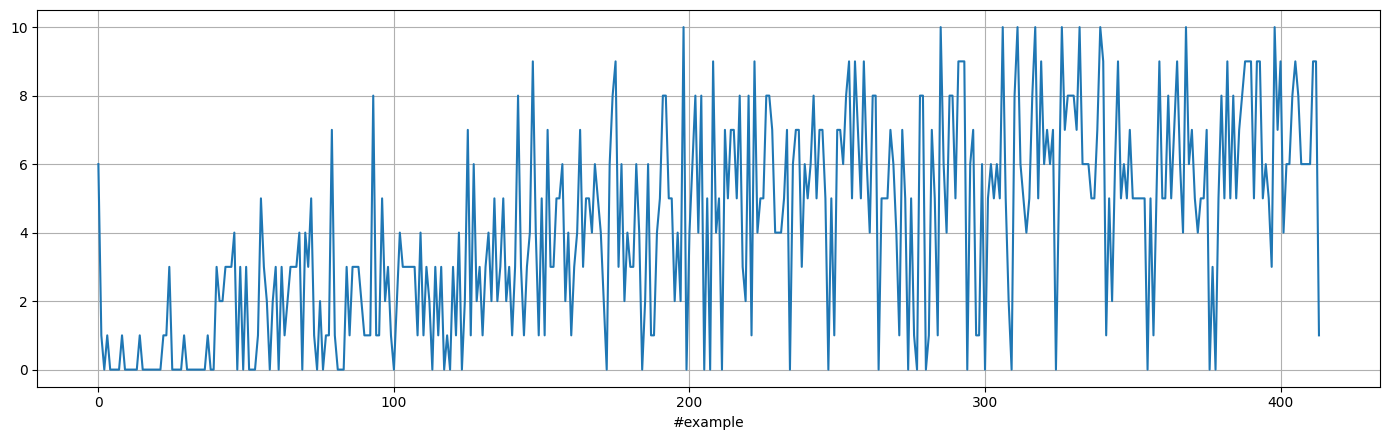

In [23]:
plt.figure()
data['#stores'].plot(xlabel='#example', grid=':', figsize=figsize)
plt.tight_layout()

* This attribute roughly increases along the table

## Using Cartesian Plots

**Let's inspect the "latitude" attribute**

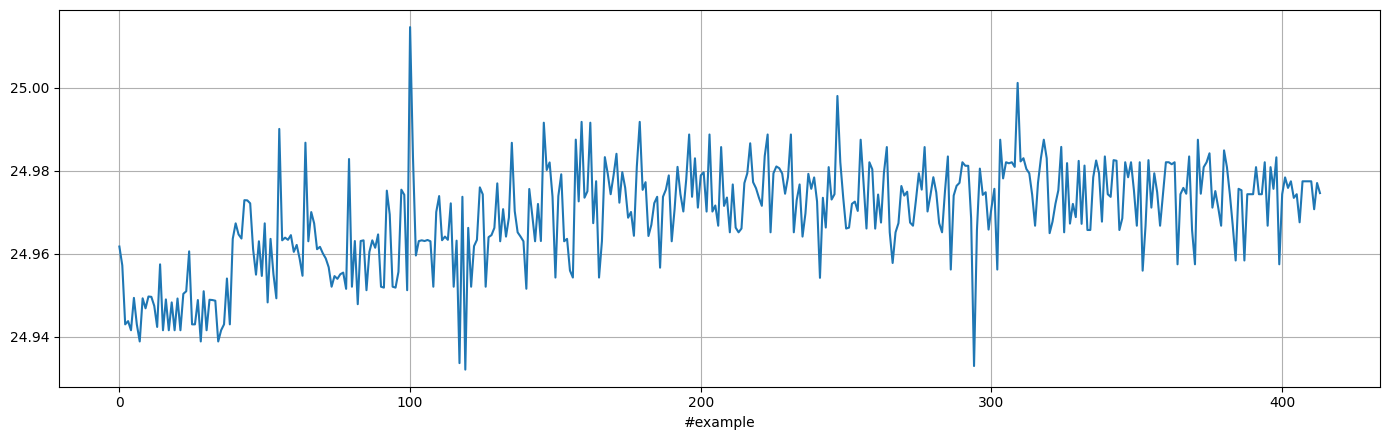

In [24]:
plt.figure()
data['latitude'].plot(xlabel='#example', grid=':', figsize=figsize)
plt.tight_layout()

* This attribute roughly increases along the table

## Using Cartesian Plots

**Let's inspect the "longitude" attribute**

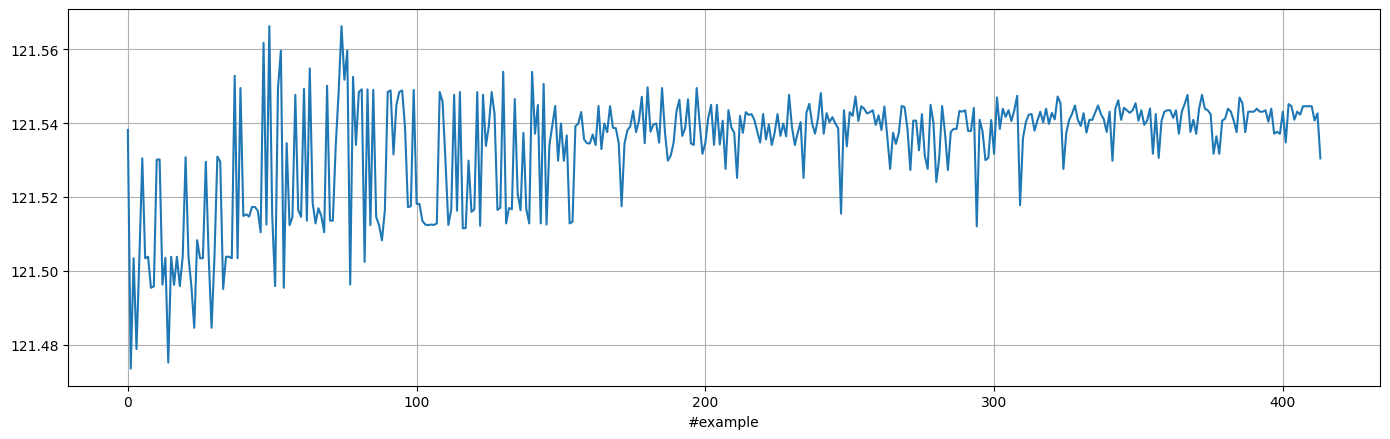

In [25]:
plt.figure()
data['longitude'].plot(xlabel='#example', grid=':', figsize=figsize)
plt.tight_layout()

* This attribute roughly increases along the table

## Using Cartesian Plots

**Let's inspect the target (i.e. "price per area")**

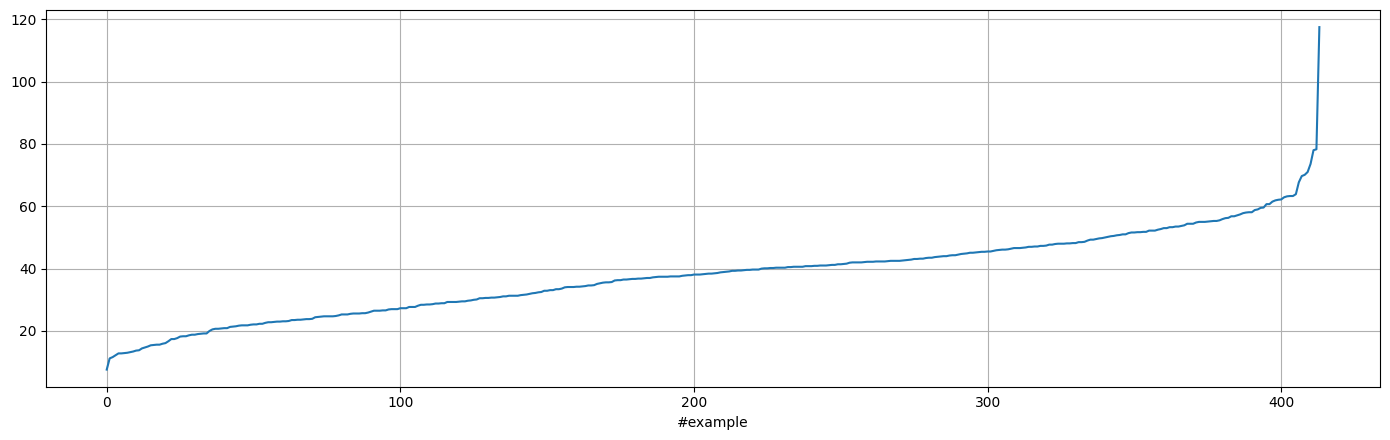

In [26]:
plt.figure()
data['price per area'].plot(xlabel='#example', grid=':', figsize=figsize)
plt.tight_layout()

* The dataset is sorted according to this attribute!

## Using Scatter Plots

**Let's inspect how "house age" and the target are linked**

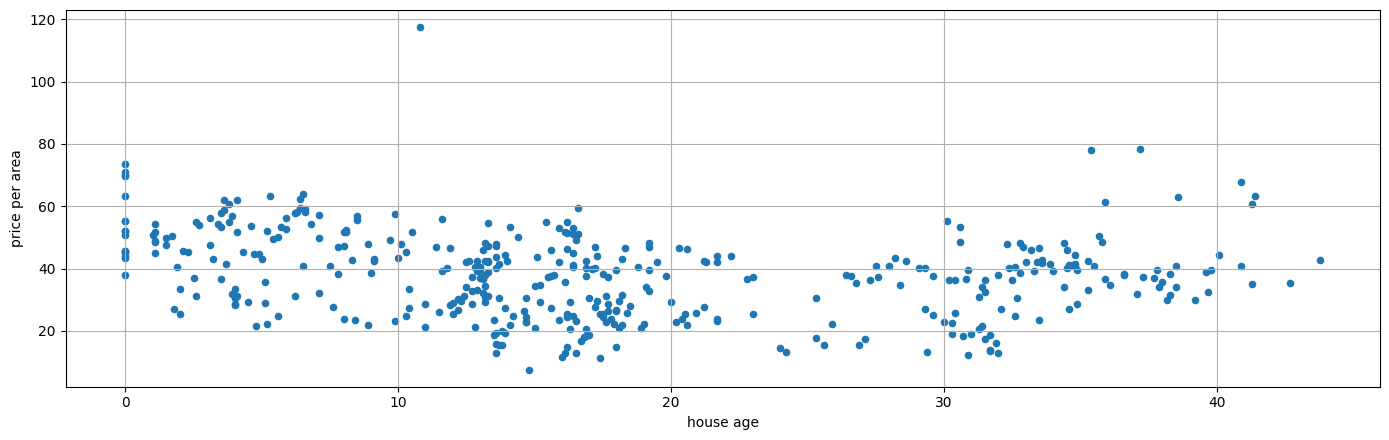

In [27]:
data.plot.scatter(x='house age', y='price per area', figsize=figsize, grid=':')
plt.tight_layout()

* There does not seem to be a strong correlation here

## Using Cartesian Plots

**Let's inspect how "dist to MRT" and the target are linked**

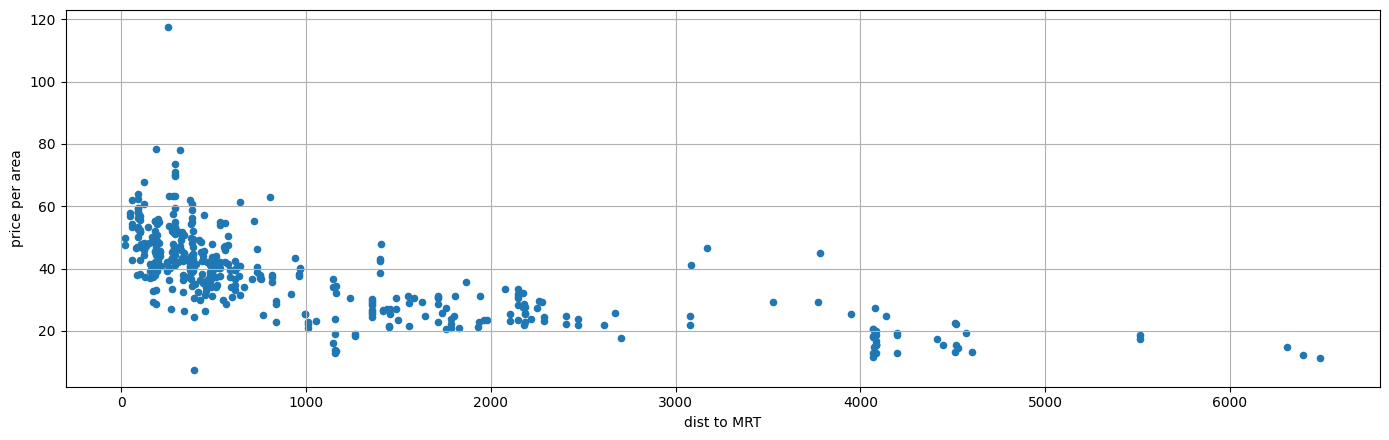

In [28]:
data.plot.scatter(x='dist to MRT', y='price per area', figsize=figsize, grid=':')
plt.tight_layout()

* The correlation is a bit stronger here

## Using Cartesian Plots

**Let's inspect how "#stores" and the target are linked**

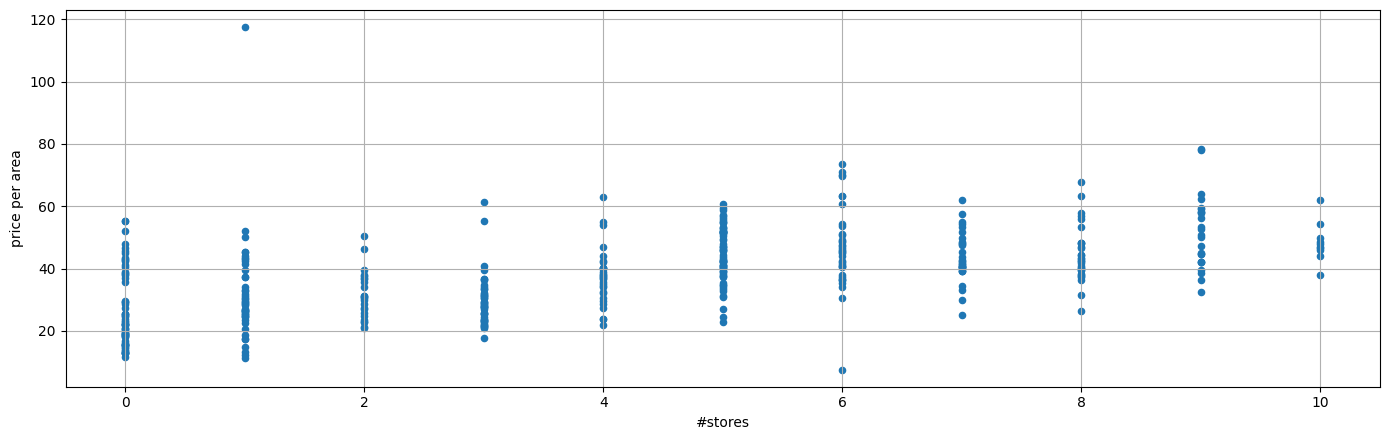

In [29]:
data.plot.scatter(x='#stores', y='price per area', figsize=figsize, grid=':')
plt.tight_layout()

* A slightly positive correlation here

## Using Cartesian Plots

**Let's inspect how "latitude" and the target are linked**

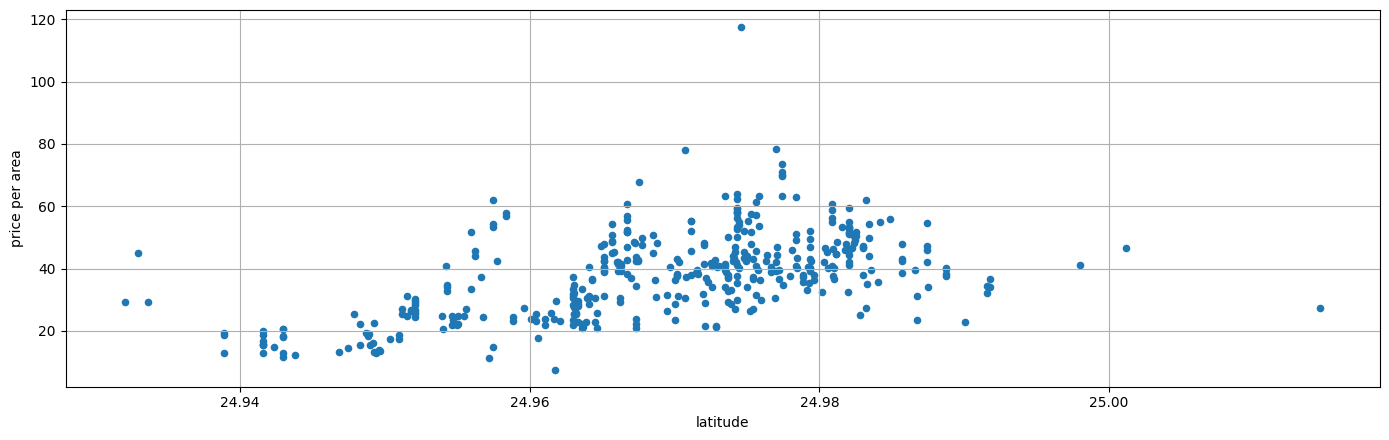

In [30]:
data.plot.scatter(x='latitude', y='price per area', figsize=figsize, grid=':')
plt.tight_layout()

* A somewhat complicated relation

## Using Cartesian Plots

**Let's inspect how "longitude" and the target are linked**

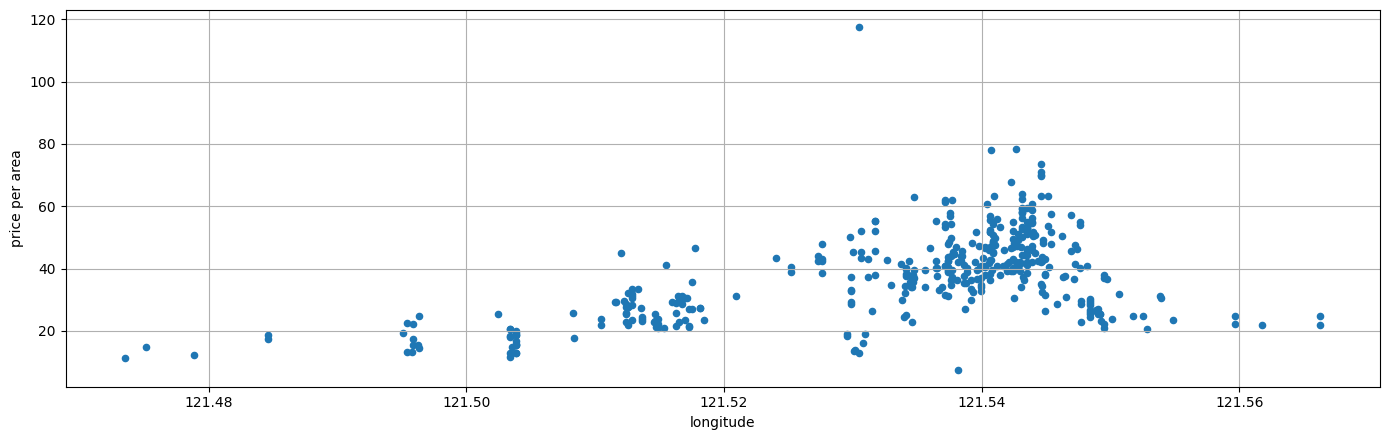

In [31]:
data.plot.scatter(x='longitude', y='price per area', figsize=figsize, grid=':')
plt.tight_layout()

* Another complicated one

## Conclusions and Take-Home Messages

**Inspecting a new dataset is _very_ important**

* We can get a sense of the dataset
* We can spot the main challenges we will have to face
* ...Including potentially some critical issues (inadequate data)
* It may prevent us from making some mistakes later
* ...And it will allow us some sanity check over the results

**Of course, these benefits depend a lot on your experience**

* Perhaps some of you already got idea by looking at the plots
* ...But for now the important things is just to keep them in mind